# Voorspelling Uitzetting Bruggen

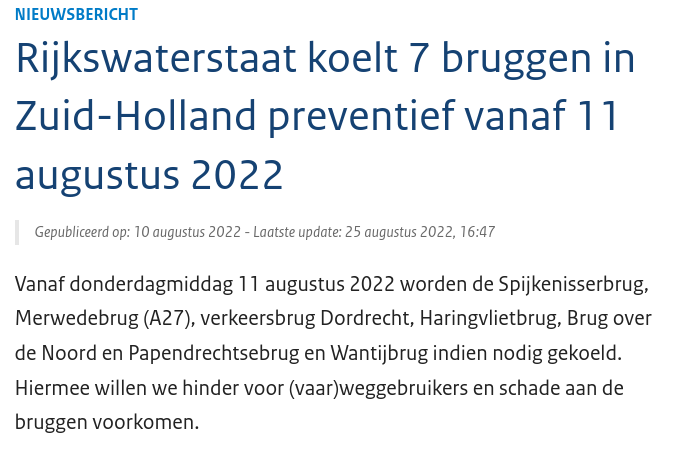

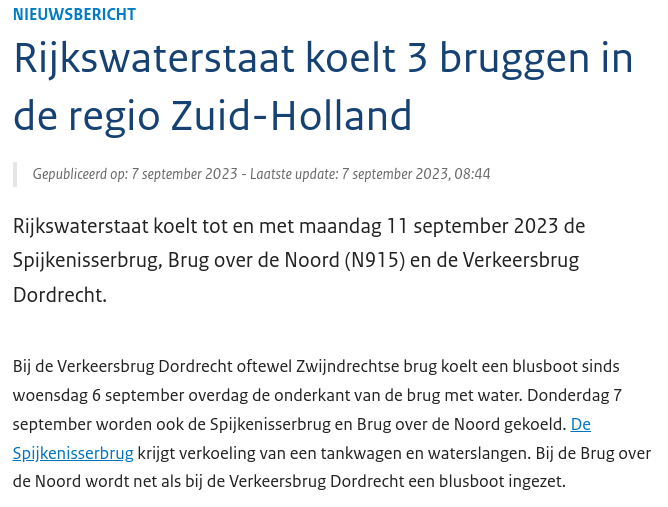

## Opdracht

Iedere zomer komt het crisisteam uitzetting bruggen een aantal keer bij elkaar om de beslissing te nemen of specifieke beweegbare bruggen gekoeld moeten worden. Door warmte zetten onderdelen van de brug uit, deze kunnen zo vast komen te zitten tegen elkaar wat schade aan het wegdek of de rest van de brug oplevert. Wanneer de buitentemperatuur drie dagen boven de dertig (30) graden stijgt worden de bruggen preventief gekoeld.

Een aantal van deze bruggen zijn voorzien van sensoren die de temperatuur van verschillende constructies op de brug meten en sensoren die de afstand van de voegopening meten.

De vraag: _Hoe kan een model worden ontwikkeld dat op basis van weersvoorspelling de voegopening van de brug voorspelt zodat deze bevindingen gebruikt kunnen worden in de besluitvorming of de brug gekoeld moet worden?_

## Werkwijze

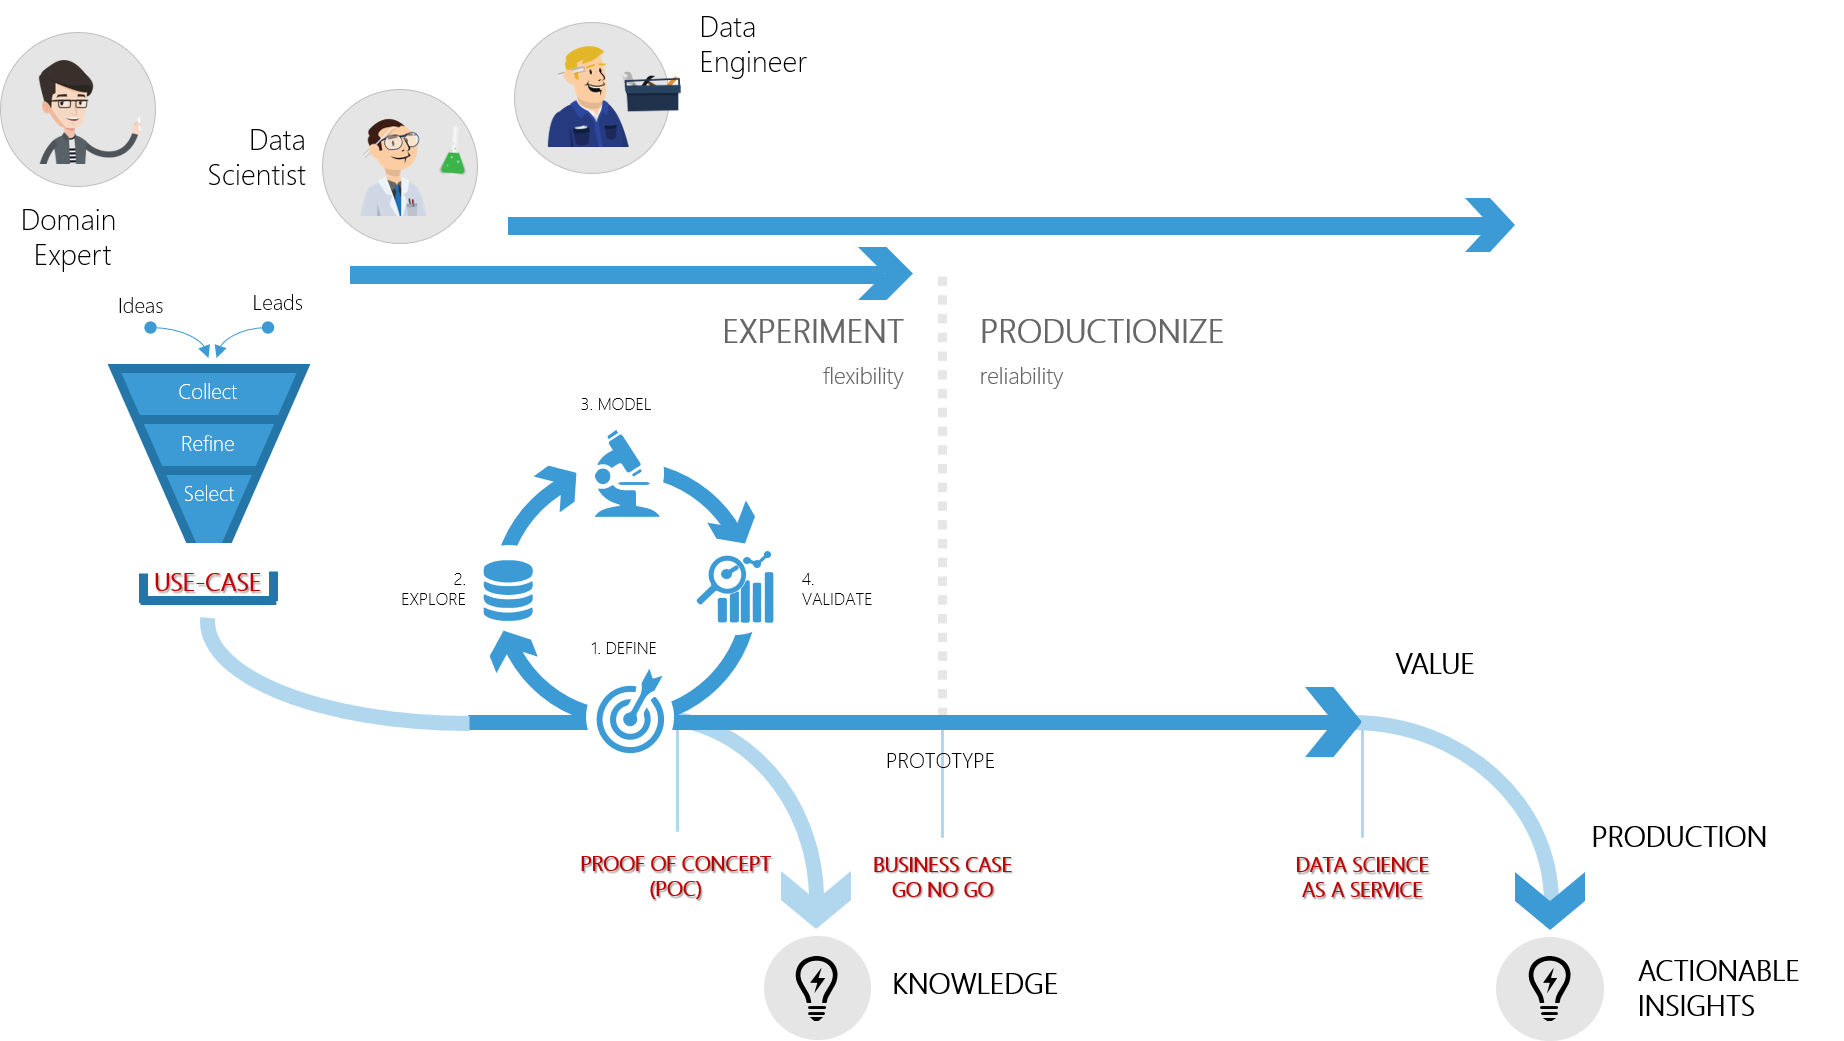

## Data Spijkenisserbrug (SPK)
Voor deze casus maken we gebruik van de data van de Spijkenisserbrug. Deze brug is voorzien van een aantal temperatuurssensoren en sensoren die de voegopening meten. We laden eerst deze data in en voeren daarop Exploratory Data Analysis (EDA) uit. Zo krijgen we een idee hoe de data eruit ziet.

In [1]:
import pandas as pd

# Lees de dataset in
data_spk = pd.read_csv("../data/test/Dataset SPK voeg- en temperatuur Test.csv", sep=";", low_memory=False, decimal=",")
# Converteer de column met timestamps naar een datetime zodat we deze makkelijker kunnen visualiseren
data_spk.tijd = pd.to_datetime(data_spk.tijd, dayfirst=True)
# Herindexeer de rijen gebasseerd op de tijds kolom
data_spk.set_index("tijd", inplace=True)

data_spk


SPK Lucht temperatuur-Temperatuur  \
tijd                                                     
2023-06-21 22:25:11                                NaN   
2023-06-21 22:25:26                                NaN   
2023-06-21 22:30:01                           20.41862   
2023-06-21 22:30:02                                NaN   
2023-06-21 22:30:03                                NaN   
...                                                ...   
2023-09-21 22:20:11                                NaN   
2023-09-21 22:25:01                           14.27985   
2023-09-21 22:25:02                                NaN   
2023-09-21 22:25:09                                NaN   
2023-09-21 22:25:11                                NaN   

                     SPK Oostval Oost-Temperatuur asfalt  \
tijd                                                       
2023-06-21 22:25:11                                  NaN   
2023-06-21 22:25:26                                  NaN   
2023-06-21 22:30:01                                  NaN   
2023-06-21 22:30:02                                  NaN   
2023-06-21 22:30:03                                  NaN   
...                                                  ...   
2023-09-21 22:20:11                                  NaN   
2023-09-21 22:25:01                                  NaN   
2023-09-21 22:25:02                                  NaN   
2023-09-21 22:25:09                                  NaN   
2023-09-21 22:25:11                                  NaN   

                     SPK Oostval Oost-Temperatuur dek  \
tijd                                                    
2023-06-21 22:25:11                               NaN   
2023-06-21 22:25:26                               NaN   
2023-06-21 22:30:01                               NaN   
2023-06-21 22:30:02                               NaN   
2023-06-21 22:30:03                               NaN   
...                                               ...   
2023-09-21 22:20:11                               NaN   
2023-09-21 22:25:01                          13.61814   
2023-09-21 22:25:02                               NaN   
2023-09-21 22:25:09                               NaN   
2023-09-21 22:25:11                               NaN   

                     SPK Oostval Oost-Temperatuur onderflens  \
tijd                                                           
2023-06-21 22:25:11                                      NaN   
2023-06-21 22:25:26                                      NaN   
2023-06-21 22:30:01                                 21.06559   
2023-06-21 22:30:02                                      NaN   
2023-06-21 22:30:03                                      NaN   
...                                                      ...   
2023-09-21 22:20:11                                      NaN   
2023-09-21 22:25:01                                 14.41751   
2023-09-21 22:25:02                                      NaN   
2023-09-21 22:25:09                                      NaN   
2023-09-21 22:25:11                                      NaN   

                     SPK Tilt Toren N-mid-Tilt dwars  \
tijd                                                   
2023-06-21 22:25:11                              NaN   
2023-06-21 22:25:26                              NaN   
2023-06-21 22:30:01                              NaN   
2023-06-21 22:30:02                              NaN   
2023-06-21 22:30:03                              NaN   
...                                              ...   
2023-09-21 22:20:11                              NaN   
2023-09-21 22:25:01                              NaN   
2023-09-21 22:25:02                              NaN   
2023-09-21 22:25:09                              NaN   
2023-09-21 22:25:11                              NaN   

                     SPK Tilt Toren N-mid-Tilt lengte  \
tijd                                                    
2023-06-21 22:25:11                               NaN   
2023-06-21

In [14]:
# Probeer zelf ook andere kolomnamen uit!
data_spk["SPK Lucht temperatuur-Temperatuur"].describe()

count    22823.000000
mean        18.521312
std          2.960971
min         10.355310
25%         16.449130
50%         18.004580
75%         19.999815
max         29.867970
Name: SPK Lucht temperatuur-Temperatuur, dtype: float64

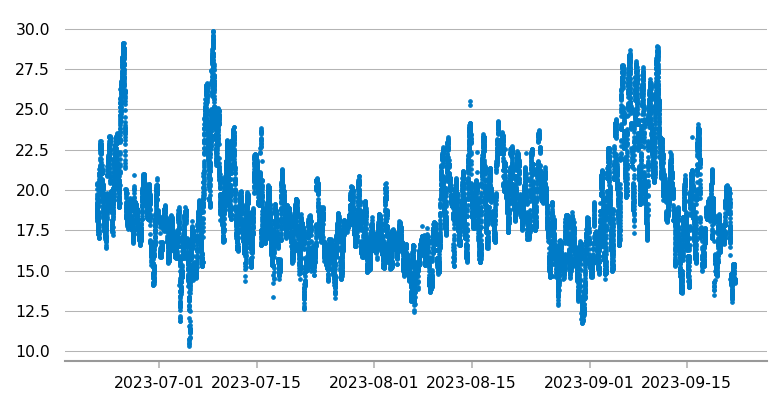

In [13]:
import matplotlib.pyplot as plt
import rijksplotlib.pyplot as rlt

# Maak een scatterplot van alle temperatuursmetingen over de tijd om inzicht te krijgen
plt.scatter(data_spk["SPK Lucht temperatuur-Temperatuur"].index, data_spk["SPK Lucht temperatuur-Temperatuur"], s=3)



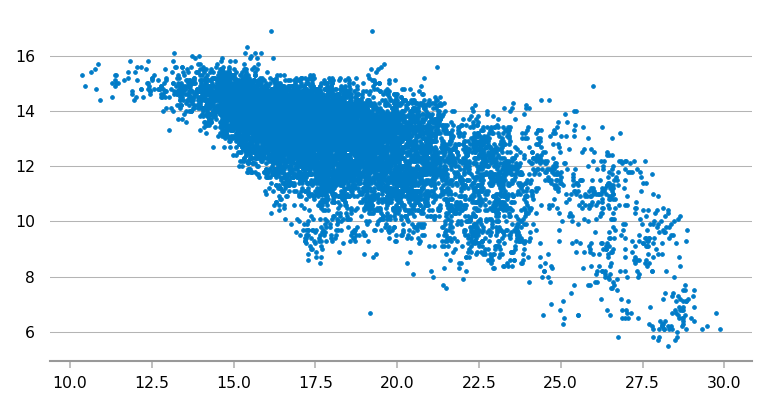

In [50]:
# Het visualiseren van data kan vaak al eerste inzichten geven
# Hier plotten we de temperatuur tegen de voegopening
# Probeer ook andere temperatuursmetingen en voegafstanden te plotten
plt.scatter(data_spk["SPK Lucht temperatuur-Temperatuur"], data_spk["SPK Voeg Westval Noordoost-Voegopening"], s=3)

<Axes: >

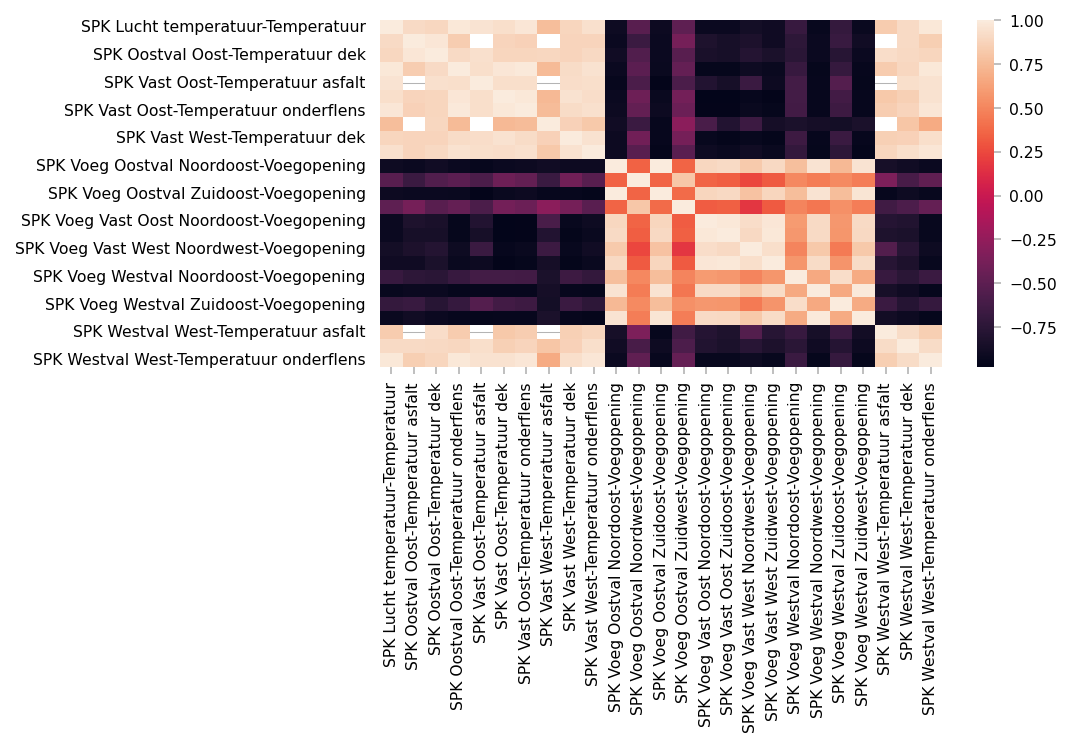

In [24]:
import seaborn as sns

# Selecteer kolommen van sensoren die betrekking hebben op de Temperatuur of Voegopening
columns = [x for x in data_spk.columns if "Temperatuur" in x or "Voegopening" in x]

# Plot een correlatiematrix van de geselecteerde sensoren
sns.heatmap(data_spk[columns].corr())

## Bouwen model
Nu we de data hebben verkend en de best kwalificerende kolommen hebben bepaald kunnen we een model trainen om een voorspelling te maken over de voegopening gebasseerd op de temperatuur. We slaan hierin, omwege de tijd, behoorlijk wat stappen over (Data Cleaning en validiteit, en de stap van de verwachtte buitentemperatuur naar de daadwerkelijk gemeten sensortemperatuur op de brug). In de Academy wordt er dieper op dit soort concepten ingegaan.

Wanneer we kijken naar de temperatuur zien we een sterk lineair verband met de voegopening. Hier kunnen we een Lineair Regressie model op trainen welke, gegeven een temperatuur, de voegopening voorspelt.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# We splitsen de data op in een train set en een test set. 
# De test set gebruiken we om de nauwkeurigheid van het model te valideren.
data_spk["weekday"] = data_spk.index.dayofweek
train_data = data_spk.query("weekday not in [5, 6]")[["SPK Lucht temperatuur-Temperatuur", "SPK Voeg Westval Noordoost-Voegopening"]].dropna()
test_data = data_spk.query("weekday in [5, 6]")[["SPK Lucht temperatuur-Temperatuur", "SPK Voeg Westval Noordoost-Voegopening"]].dropna()

train_data

voeg_estimator = LinearRegression()
voeg_estimator.fit(train_data[["SPK Lucht temperatuur-Temperatuur"]], train_data["SPK Voeg Westval Noordoost-Voegopening"])

predictions = voeg_estimator.predict(test_data[["SPK Lucht temperatuur-Temperatuur"]])


In [38]:
import numpy as np

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(test_data["SPK Voeg Westval Noordoost-Voegopening"], predictions)

explained_variance:  0.5471
mean_squared_log_error:  0.0099
r2:  0.5467
MAE:  0.9357
MSE:  1.4184
RMSE:  1.191


## Verantwoord Visualiseren
Het Datalab heeft een Python package ontwikkeld voor het stylen van visualisaties. Op deze manier kan iedereen op een uniforme manier grafieken genereren. De Package zelf is te vinden op de onderstaande link en de academy gaat verder in op het gebruik hiervan.

https://rwsdatalab.gitlab.io/public/codebase/tools/rijksplotlib/index.html


INFO:2023/10/30 10:08:30 AM - rijksplotlib.validate - Missing legend, is this correct? If not, use rlt.legend()


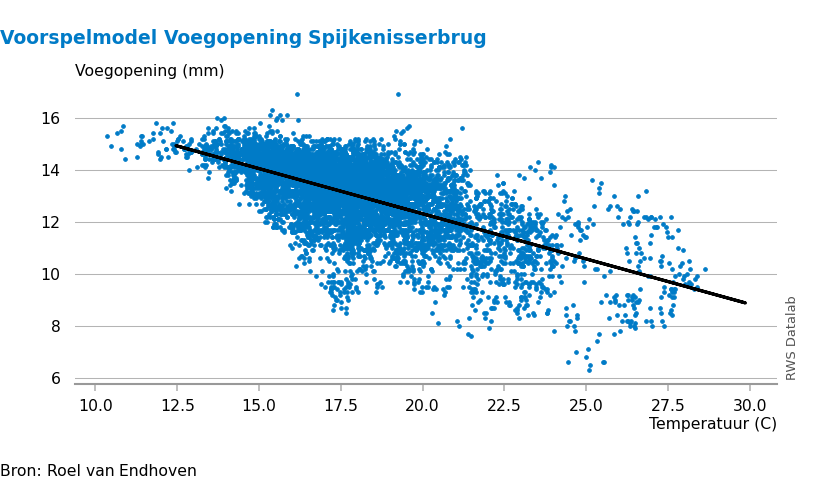

In [51]:
plt.scatter(train_data[["SPK Lucht temperatuur-Temperatuur"]], train_data["SPK Voeg Westval Noordoost-Voegopening"],s=3)
plt.plot(test_data["SPK Lucht temperatuur-Temperatuur"], predictions,color='k')

rlt.title("Voorspelmodel Voegopening Spijkenisserbrug")
rlt.xlabel("Temperatuur (C)")
rlt.ylabel("Voegopening (mm)")
rlt.source("Roel van Endhoven")
rlt.logo_rwsdatalab()
rlt.show()

In [58]:
# We kunnen nu op basis van de verwachtte luchttemperatuur een voorspelling doen over de voegopening

new_predictions = voeg_estimator.predict(np.array([32.3, 25.5, 3.4]).reshape(-1,1))
new_predictions

/home/roel/projects/envs/workshop-connectit/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 8.03771681, 10.400267  , 18.0785551 ])